# Trabalho 1 - Simulação de um sistema não linear e suas caracteristicas

## Aluno:
- Nome: Felipe Fonseca Rocha
- Matrícula: 2015117096

## Sistema escolhido
O modelo escolhido é o de um atuador pneumático, o sistema pode ser descrito de forma aproximada usando
uma aproximação de 3º ordem:

$
\dot{y_1} = y_2
$

$
\dot{y_2} = y_3 \\
$

$
\dot{y_3} = -\omega_n^2y_2 - 2 \zeta\omega_n y_3 + K_q \omega_n^2 U_T
$

Onde $\omega_n = \sqrt{\frac{2\gamma p_s}{3M}(\frac{A²}{V_{A_0}+Ay_1}+\frac{A²}{V_{B_0}-Ay_1})}$

Os parametros utilizados são

## Classificação do sistema

| Variável   |    Valor      |
|:----------:|:-------------:|
| $\gamma$   |    $1,4$      |
| A          |    $4,91\times10^4m^2$   |
| M          |    $0,5kg$    |
| $p_s$      |    $6\times10^5Pa$   |
| $p_atm$    |    $1\times10^5Pa$   |
| $V_{A0}$   |    $1,25\times10^{-4}m^3$   |
| $V_{B0}$   |    $1,25\times10^{-4}m^3$   |
| $L$        |    $0,5m$     |
| $\zeta$    |    $0,4$      |
| $Q_n$      |    $0,012 \frac{m^3}{s}$   |
| $U_{Tmax}$ |    $10V$      |


In [25]:
import math
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['legend.fontsize'] = 10
#$\omega_n = A_1y_1^4 + B_1y_1³ + C_1 y_1² + D_1y_1 + E_1$

### Definição das equações de estado

In [26]:
def freq_natural(y):
    gamma = 1.4
    A = 4.91 * (10 ** 4)
    M = 0.5
    ps = 6 * (10 ** 5)
    v_a0 = 1.25 * ( 10 ** -4)
    v_b0 = 1.25 * ( 10 ** -4)

    term2 = (((A ** 2) / (v_a0 + A* y[0])) + ((A ** 2) / (v_b0 - A * y[0])))
    wn = (( 2 * gamma * ps ) / (3 * M)) * abs(term2)
    if wn < 0 :
        print(f'raiz de {wn} * {term2}')

    return math.sqrt(wn)

In [27]:
def k_q():
    q_n = 0.012
    p_atm = 1 * 10 ** 5
    ps = 6 * 10 ** 5
    U_tmax = 10

    return (q_n * p_atm) / (2 / 3 * ps * U_tmax )

In [28]:
def dvCord(x, ux, uy, t):
    # a = 0.258
    # b = 4.033
    # F = 8
    # G = 1
    epsilon = 8.53
    zeta = 0.4
    omega_n = freq_natural(x)

    xd = np.array(np.zeros((3, 1)))

    xd[0] = x[1]
    xd[1] = x[2]
    xd[2] = -omega_n ** 2 * x[1] - 2 * zeta * omega_n * x[2] + k_q() * omega_n ** 2 * ux
    return xd.copy()


### Definição de Runge-Kutta

In [29]:
def rk_cord(x0, ux, uy, h, t):
    # 1st evaluation
    xd = dvCord(x0, ux, uy, t)
    savex0 = x0.copy()
    phi = xd.copy()
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 2nd evaluation
    xd = dvCord(x0.T, ux, uy, t + 0.5 * h)
    phi = (phi + 2 * xd)
    for i in range(len(x0)):
        x0[i] = savex0[i] + 0.5 * h * xd[i]

    # 3rd evaluation
    xd = dvCord(x0, ux, uy, t + 0.5 * h)
    phi = phi + 2 * xd
    for i in range(len(x0)):
        x0[i] = savex0[i] + h * xd[i]

    # 4th evaluation
    xd = dvCord(x0, ux, uy, t + h)

    result_x = x0.copy()
    for i in range(len(x0)):
        result_x[i] = savex0[i] + (phi[i] + xd[i]) * h / 6

    return result_x


### Plot das funções

In [30]:
def run_rk(t:np.ndarray, x:np.ndarray, u, h):
    result = None
    for k in range(1, len(t)):
        result = rk_cord(x[:, k - 1].copy(), u[k], u[k], h, t[k])
        x[:, k] = result
    
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax.set(xlabel='time')
    ax.set(ylabel='u')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax.plot(t, u, color=color[random.randint(0, len(color) - 1)])
    ax.grid()
    fig0, ax0 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax0.set(xlabel='time')
    ax0.set(ylabel='x_1')
    color = ['red', 'green', 'blue', 'yellow', 'orange']
    ax0.plot(t, x[0, :], color=color[random.randint(0, len(color) - 1)])
    ax0.grid()
    fig1, ax1 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax1.set(xlabel='time')
    ax1.set(ylabel='x_2')
    ax1.plot(t, x[1, :], color=color[random.randint(0, len(color) - 1)])
    ax1.grid()
    fig2, ax2 = plt.subplots(constrained_layout=True, figsize=(8, 4))
    ax2.set(xlabel='time')
    ax2.set(ylabel='x_3')
    ax2.plot(t, x[2, :], color=color[random.randint(0, len(color) - 1)])
    ax2.grid()
    plt.show()

### Definições dos parâmetros
 Os parametros concnetrados do sistema em análise são difinidos a seguir sendo que o $\mu$ pode
 definido como muito superior ao valor de refeência para o comportamente do sistema de maneira oscilatóra
 e bem com uma curva característica.

In [31]:
t0 = 0
tf = 3000
h = 0.1
t = np.arange(t0, tf, h)

# [print(i) for i in t if i < 0.1]

x0 = np.array([[1], [0], [0]])

z_x = np.zeros((len(x0), len(t) - 1))
x = x0.copy()
x = np.append(x, z_x, axis=1)

# print(x)

Ts = 1 / 100
omega = (2 * math.pi) / 10
U = 1.2


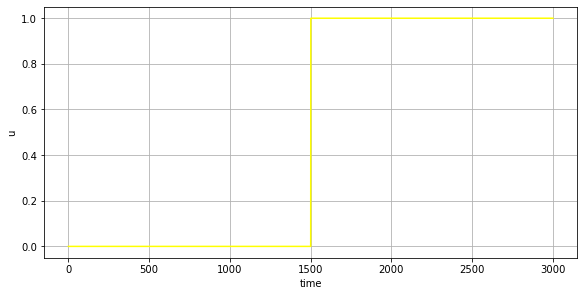

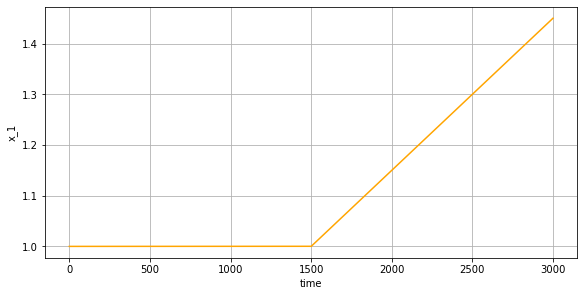

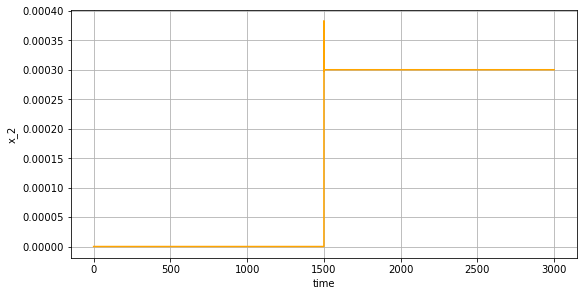

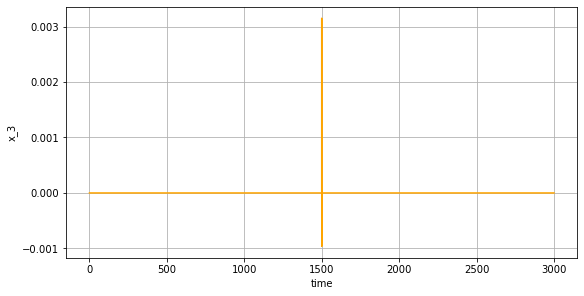

In [32]:
# Degrau
u = np.append(np.zeros((math.floor(len(t)/2), 1)), np.full((math.floor(len(t) - len(t)/2), 1), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

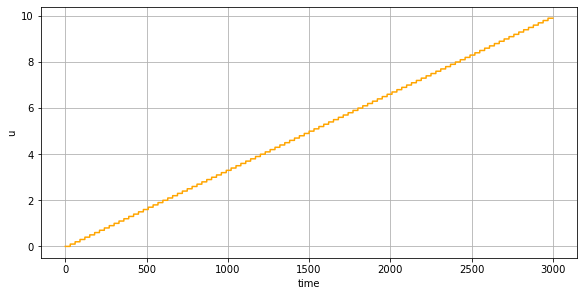

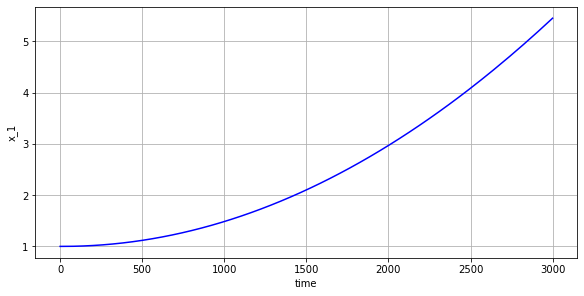

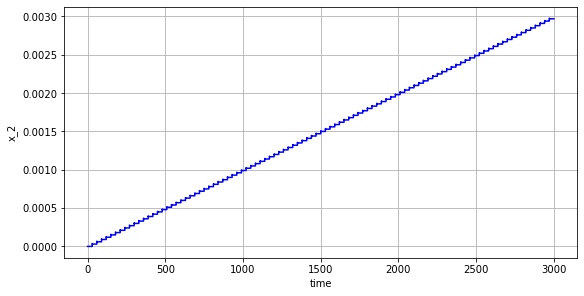

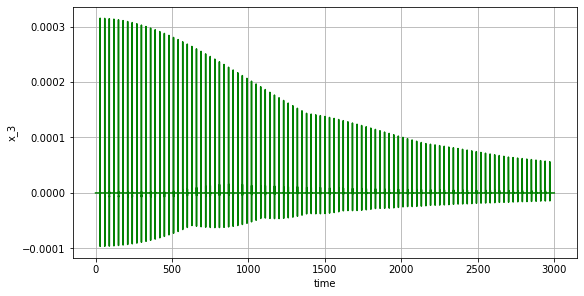

SEQUENCE


In [38]:
# Sequencia de Degrau
level = np.arange(0, 2, 0.1)
width = math.floor(len(t)/len(level))
ones = np.ones((1,width))
arr = [ level[i] * j  for i in range(len(level)) for j in ones]
u = np.array((arr)).flatten()
run_rk(t.copy() ,x.copy(), u.copy() , h)
print("SEQUENCE")

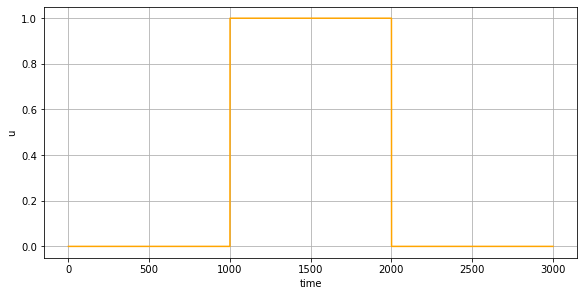

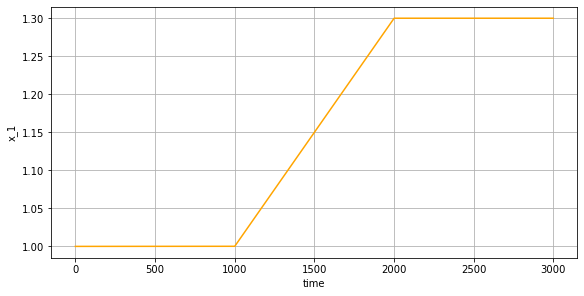

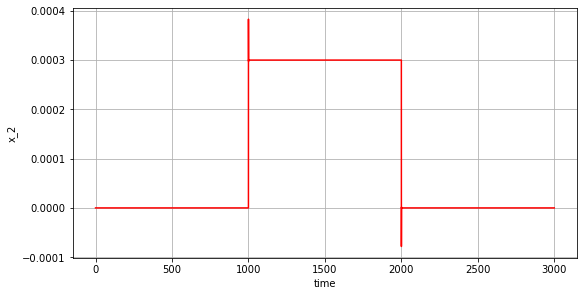

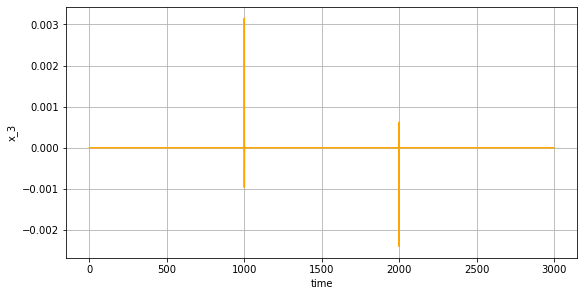

In [34]:
# Pulso
u = 10 * np.append(np.append(np.zeros((math.floor(len(t)/3), 1)), np.full((math.floor(len(t)/3), 1), 1)), np.zeros((math.floor(len(t)/3), 1)))
run_rk(t.copy() ,x.copy(), u.copy() , h)

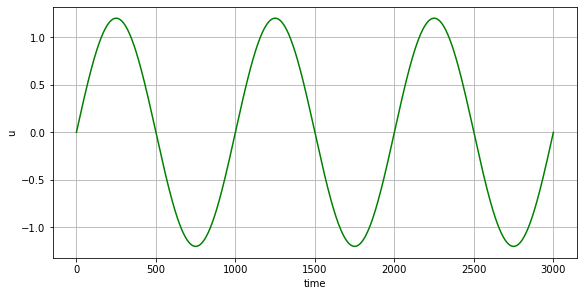

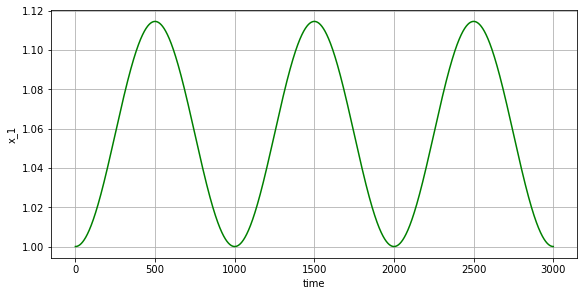

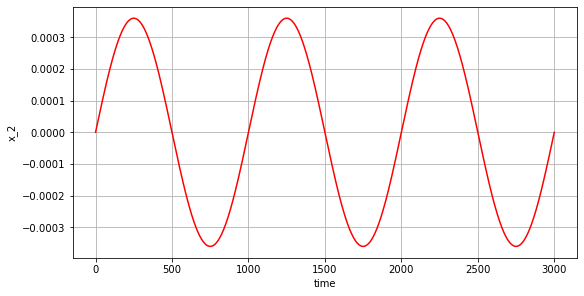

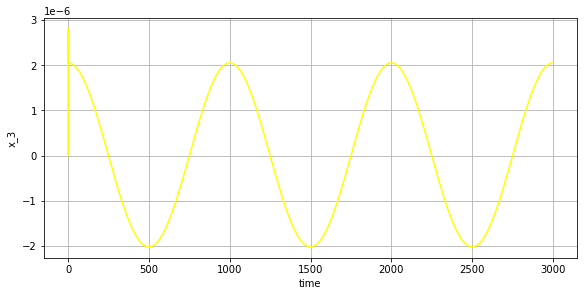

In [35]:
# Crescente
u = 10 * np.array([U * math.sin(omega * i * Ts) for i in t])  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)

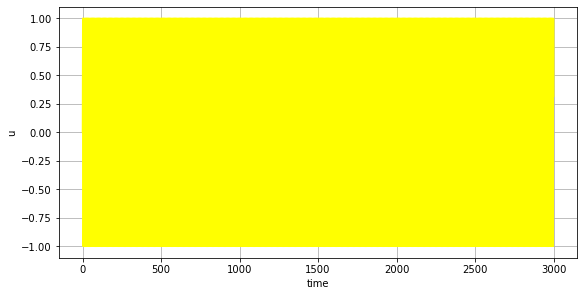

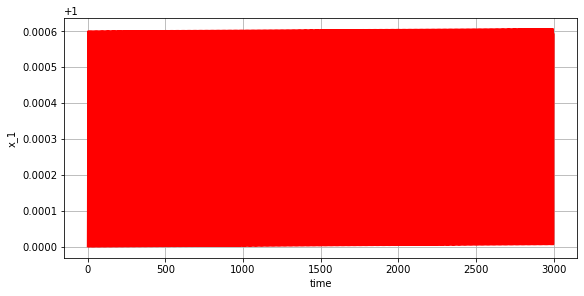

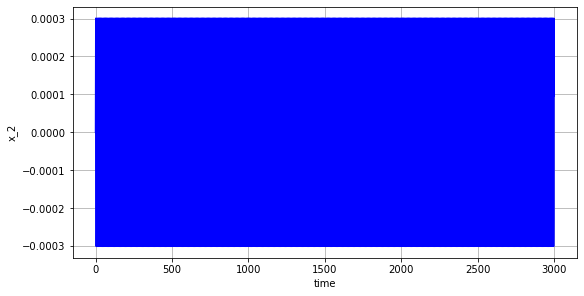

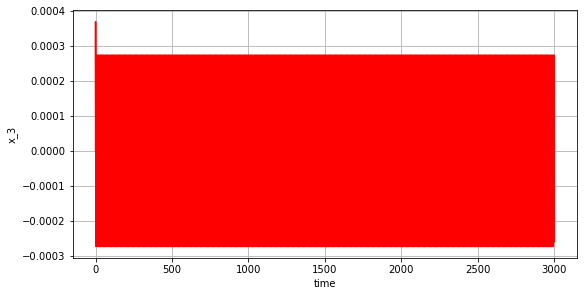

In [36]:
# Senoidal
u = 10 * np.sin(np.array(t))  # np.zeros((len(t), 1))
run_rk(t.copy() ,x.copy(), u.copy() , h)


# Referência
[Teoria de simulação de Van Der Pol](https://hal.archives-ouvertes.fr/hal-00734058/document)

[Teoria do uso de modelo de Van Der Pol](https://www.johndcook.com/blog/2019/12/26/van-der-pol-period/)

[Trabalho prático utilizado para o modelo](https://repository.library.northeastern.edu/files/neu:336724/fulltext.pdf)

[Controle e Sistemas](ftp://ftp.dca.fee.unicamp.br/pub/docs/vonzuben/ea932_03/aulas/topico7_03.pdf)